In [ ]:
# def build_model():
#     # input_dim是输入的train_x的最后一个维度，train_x的维度为(n_samples, time_steps, input_dim)
#     model = Sequential()
#     model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
#     print(model.layers)
#     model.add(LSTM(100, return_sequences=False))
#     model.add(Dense(output_dim=1))
#     model.add(Activation('linear'))

#     model.compile(loss='mse', optimizer='rmsprop')
#     return model


# def train_model(train_x, train_y, test_x, test_y):
#     model = build_model()

#     try:
#         model.fit(train_x, train_y, batch_size=512, nb_epoch=30, validation_split=0.1)
#         predict = model.predict(test_x)
#         predict = np.reshape(predict, (predict.size, ))
#     except KeyboardInterrupt:
#         print(predict)
#         print(test_y)
#     print(predict)
#     print(test_y)
#     try:
#         fig = plt.figure(1)
#         plt.plot(predict, 'r:')
#         plt.plot(test_y, 'g-')
#         plt.legend(['predict', 'true'])
#     except Exception as e:
#         print(e)
#     return predict, test_y


# if __name__ == '__main__':
#     train_x, train_y, test_x, test_y, scaler = load_data('international-airline-passengers.csv')
#     train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
#     test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
#     predict_y, test_y = train_model(train_x, train_y, test_x, test_y)
#     predict_y = scaler.inverse_transform([[i] for i in predict_y])
#     test_y = scaler.inverse_transform(test_y)
#     fig2 = plt.figure(2)
#     plt.plot(predict_y, 'g:')
#     plt.plot(test_y, 'r-')
#     plt.show()

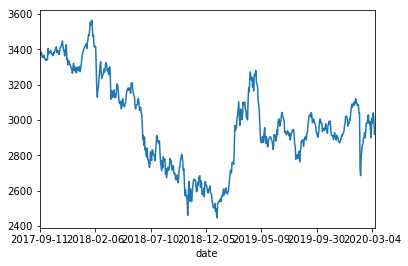

In [11]:
# import tushare as ts
# import matplotlib.pyplot as plt
# data=ts.get_hist_data('sh',ktype='d')
# data_all=data.open
# data_all=data_all.sort_index(axis=0)
# #print(data_all)
# data_all.plot()
# plt.show()

    

D:\Python\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Python\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


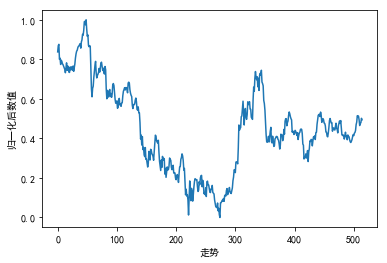

D:\Python\lib\site-packages\ipykernel\__main__.py:50: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
D:\Python\lib\site-packages\ipykernel\__main__.py:50: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`


D:\Python\lib\site-packages\ipykernel\__main__.py:53: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
D:\Python\lib\site-packages\ipykernel\__main__.py:63: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 362 samples, validate on 41 samples
Epoch 1/30
362/362 [==============================] - 2s 5ms/step - loss: 0.2712 - val_loss: 0.0902
Epoch 2/30
362/362 [==============================] - 0s 168us/step - loss: 0.1286 - val_loss: 0.0277
Epoch 3/30
362/362 [==============================] - 0s 154us/step - loss: 0.0462 - val_loss: 0.0017
Epoch 4/30
362/362 [==============================] - 0s 143us/step - loss: 0.0087 - val_loss: 0.0022
Epoch 5/30
362/362 [==============================] - 0s 175us/step - loss: 0.0082 - val_loss: 0.0018
Epoch 6/30
362/362 [==============================] - 0s 139us/step - loss: 0.0080 - val_loss: 0.0022
Epoch 7/30
362/362 [==============================] - 0s 121us/step - loss: 0.0077 - val_loss: 0.0023
Epoch 8/30
362/362 [==============================] - 0s 138us/step - loss: 0.0079 - val_loss: 0.0027
Epoch 9/30
362/362 [==============================] - 0s 187us/step - loss: 0.0080 - val_loss: 0.0040
Epoch 10/30
362/362 [==================

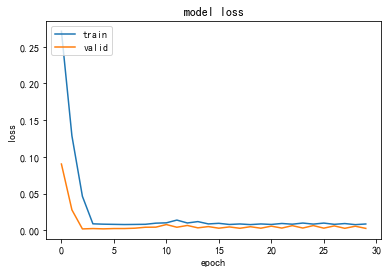

[0.45375246 0.4554358  0.45562243 0.45217606 0.4474441  0.4377921
 0.42460784 0.41048473 0.394381   0.3787168  0.3650992  0.35313368
 0.34762415 0.34445232 0.35021824 0.35668916 0.36516106 0.37291127
 0.38197127 0.38988128 0.39641833 0.40820393 0.41561386 0.4210297
 0.42383486 0.427874   0.43313494 0.44113508 0.4546363  0.46762395
 0.4801602  0.49351922 0.5066979  0.52118504 0.530213   0.5375779
 0.5402134  0.54006284 0.53653675 0.532049   0.52650607 0.5203157
 0.51067823 0.5011095  0.49366203 0.48530322 0.47725457 0.47248366
 0.47199595 0.47330683 0.4764963  0.4830182  0.48789525 0.49338114
 0.49814317 0.49985555 0.49799216 0.4930341  0.48836094 0.48493683
 0.48253447 0.47917238 0.48062596 0.481924   0.48384032 0.48698694
 0.4912361  0.49294102 0.49089092 0.48972002 0.48731482 0.4854646
 0.47861972 0.47036415 0.4618596  0.45468947 0.44667614 0.44213757
 0.44124818 0.4404289  0.44001928 0.4387172  0.43832704 0.43578988
 0.4309912  0.42858157 0.42661643 0.42740852 0.4266188  0.42752397


D:\Python\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


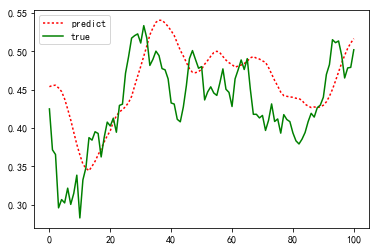

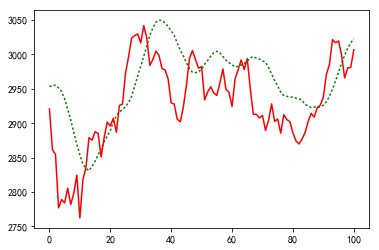

26.630072064036476


In [5]:
import tushare as ts
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from datetime import datetime
from sklearn.metrics import mean_squared_error

data=ts.get_hist_data('sh',ktype='d',start='2017-11-01',end='2019-12-30')
data_open=data.open
data_open=data_open.sort_index(axis=0)

def load_data(data,sequence_length=10, split=0.8):
    data_all = np.array(data).astype(float)
    scaler = MinMaxScaler()
    data_all = scaler.fit_transform(data_all)
    #print(data_all)
    #print(len(data_all))
    data_index=[]
    for e in range(515):
        data_index.append(str(e))
    plt.xlabel("走势") 
    plt.ylabel("归一化后数值") 
    plt.plot(data_index,data_all)
    plt.rcParams['font.sans-serif']=['SimHei'] 
    plt.show()
    data = []
    for i in range(len(data_all) - sequence_length - 1):
        data.append(data_all[i: i + sequence_length + 1])
    reshaped_data = np.array(data).astype('float64')
#   np.random.shuffle(reshaped_data)
    # 对x进行统一归一化，而y则不归一化
    x = reshaped_data[:, :-1]
    y = reshaped_data[:, -1]
    split_boundary = int(reshaped_data.shape[0] * split)
    #print(int(reshaped_data.shape[0]))                                                                                                          
    train_x = x[: split_boundary]
    test_x = x[split_boundary:]

    train_y = y[: split_boundary]
    test_y = y[split_boundary:]
    return train_x, train_y, test_x, test_y, scaler

def build_model():
    # input_dim是输入的train_x的最后一个维度，train_x的维度为(n_samples, time_steps, input_dim)
    model = Sequential()
    model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
    print(model.layers)
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(output_dim=1))
    model.add(Activation('linear'))
    model.compile(loss='mse', optimizer='rmsprop')
    return model


def train_model(train_x, train_y, test_x, test_y):
    model = build_model()

    try:
        history=model.fit(train_x, train_y, batch_size=512, nb_epoch=30, validation_split=0.1)
        predict = model.predict(test_x)
        predict = np.reshape(predict, (predict.size, ))
        
        
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        plt.plot(loss, label='loss')
        plt.plot(val_loss, label='val_loss')
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'valid'], loc='upper left')
        plt.show()
        
    except KeyboardInterrupt:
        print(predict)
        print(test_y)
    print(predict)
    print(test_y)
    try:
        fig = plt.figure(1)
        plt.plot(predict, 'r:')
        plt.plot(test_y, 'g-')
        plt.legend(['predict', 'true'])
    except Exception as e:
        print(e)
    return predict, test_y

if __name__ == '__main__':
    train_x, train_y, test_x, test_y, scaler = load_data(data_open)
    train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
    test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
    predict_y, test_y = train_model(train_x, train_y, test_x, test_y)
    predict_y = scaler.inverse_transform([[i] for i in predict_y])
    test_y = scaler.inverse_transform(test_y)
    fig2 = plt.figure(2)
    plt.plot(predict_y, 'g:')
    plt.plot(test_y, 'r-')
    plt.show()
    rmse = math.sqrt(mean_squared_error(test_y[-5:],predict_y[-5:]))
    print(rmse)

D:\Python\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Python\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Python\lib\site-packages\ipykernel\__main__.py:39: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
D:\Python\lib\site-packages\ipykernel\__main__.py:39: UserWarning: Update your `LSTM` call to the Keras 2 API: `L

D:\Python\lib\site-packages\ipykernel\__main__.py:42: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
D:\Python\lib\site-packages\ipykernel\__main__.py:52: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 428 samples, validate on 48 samples
Epoch 1/30
428/428 [==============================] - 4s 9ms/step - loss: 0.2655 - val_loss: 0.0954
Epoch 2/30
428/428 [==============================] - 0s 193us/step - loss: 0.1161 - val_loss: 0.0251
Epoch 3/30
428/428 [==============================] - 0s 186us/step - loss: 0.0357 - val_loss: 0.0018
Epoch 4/30
428/428 [==============================] - 0s 203us/step - loss: 0.0074 - val_loss: 0.0018
Epoch 5/30
428/428 [==============================] - 0s 175us/step - loss: 0.0071 - val_loss: 0.0018
Epoch 6/30
428/428 [==============================] - 0s 196us/step - loss: 0.0068 - val_loss: 0.0018
Epoch 7/30
428/428 [==============================] - 0s 214us/step - loss: 0.0066 - val_loss: 0.0018
Epoch 8/30
428/428 [==============================] - 0s 201us/step - loss: 0.0063 - val_loss: 0.0018
Epoch 9/30
428/428 [==============================] - 0s 198us/step - loss: 0.0061 - val_loss: 0.0019
Epoch 10/30
428/428 [==================

D:\Python\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


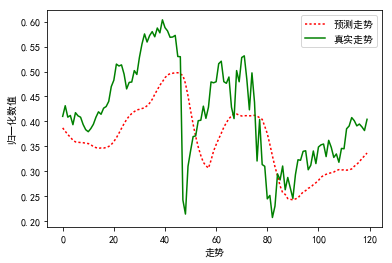

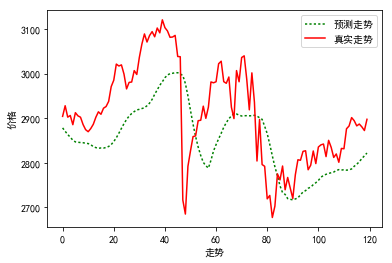

In [7]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation


data=ts.get_hist_data('sh',ktype='d')
data_open=data.open
data_open=data_open.sort_index(axis=0)

def load_data(data,sequence_length=10, split=0.8):
    data_all = np.array(data).astype(float)
    scaler = MinMaxScaler()
    data_all = scaler.fit_transform(data_all)
    
    data = []
    for i in range(len(data_all) - sequence_length - 1):
        data.append(data_all[i: i + sequence_length + 1])
    reshaped_data = np.array(data).astype('float64')
#   np.random.shuffle(reshaped_data)
    # 对x进行统一归一化，而y则不归一化
    x = reshaped_data[:, :-1]
    y = reshaped_data[:, -1]
    
    split_boundary = int(reshaped_data.shape[0] * split)
    train_x = x[: split_boundary]
    test_x = x[split_boundary:]

    train_y = y[: split_boundary]
    test_y = y[split_boundary:]
    return train_x, train_y, test_x, test_y, scaler

def build_model():
    # input_dim是输入的train_x的最后一个维度，train_x的维度为(n_samples, time_steps, input_dim)
    model = Sequential()
    model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
    print(model.layers)
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(output_dim=1))
    model.add(Activation('linear'))
    model.compile(loss='mse', optimizer='rmsprop')
    return model


def train_model(train_x, train_y, test_x, test_y):
    model = build_model()

    try:
        model.fit(train_x, train_y, batch_size=512, nb_epoch=30, validation_split=0.1)
        predict = model.predict(test_x)
        predict = np.reshape(predict, (predict.size, ))
    except KeyboardInterrupt:
        print(predict)
        print(test_y)
    print(predict)
    print(test_y)
    try:
        fig = plt.figure(1)
        

        plt.ylabel('归一化数值')
        plt.xlabel('走势')
        
        plt.plot(predict, 'r:',label='预测走势')
        plt.plot(test_y, 'g-',label='真实走势')
        plt.legend()
    except Exception as e:
        print(e)
    return predict, test_y

if __name__ == '__main__':
    plt.rcParams['font.sans-serif']=['SimHei'] 
    train_x, train_y, test_x, test_y, scaler = load_data(data_open)
    train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
    test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
    predict_y, test_y = train_model(train_x, train_y, test_x, test_y)
    predict_y = scaler.inverse_transform([[i] for i in predict_y])
    test_y = scaler.inverse_transform(test_y)
    plt.show()
#           plt.plot(loss, label='loss')
#      plt.plot(val_loss, label='val_loss')
#        plt.title('model loss')
#        plt.ylabel('loss')
#        plt.xlabel('epoch')
#        plt.legend(['train', 'valid'], loc='upper left')
#        plt.show()
    plt.plot(predict_y, 'g:',label='预测走势')
    plt.plot(test_y, 'r-',label='真实走势')
    plt.ylabel('价格')
    plt.xlabel('走势')
    plt.legend()
    plt.show()